In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as  np
from scipy import fft
import os
from training_model import extract_features_from_entry

WINDOW_SIZE = 150
NUM_OF_SENSORS = 2
OVERLAP = int(WINDOW_SIZE / 2)
THRESHOLD = 220

Accuracy: 0.7152917505030181


In [ ]:
csv_file = pd.read_csv('data2.csv')
N = int(csv_file.shape[0])
Fs = 100
frequencies_hz = np.fft.fftfreq(N, 1/Fs)[:N//2 + 1]

emg = csv_file.iloc[:, 1]
frequencies_hz.size

In [ ]:
plt.plot(emg)

In [ ]:
X = abs(fft.fft(emg))[0:int(N/2) + 1]

plt.stem(frequencies_hz, X)

In [24]:
emg = pd.read_csv('./entries/3_emg_1.csv')
emg = emg.iloc[:, 1:]

c = 0
first = True
values = np.zeros((NUM_OF_SENSORS, WINDOW_SIZE))

l = []


emg_raw = np.zeros((NUM_OF_SENSORS, WINDOW_SIZE))

print(emg.shape)
print(emg_raw.shape)

def extract_features_from_entry(values):
    n = np.array([])
    
    for row in values:
        v = np.sqrt(np.mean(row**2)), np.mean(abs(row)), np.sum(row**2), np.sum(abs(row))
        v = list(v)
        n = np.hstack((n, np.array(v)))
    
    return n


for _, row in emg.iterrows():
    emg_raw[:, c] = row

    if (c == WINDOW_SIZE - 1 and first) or (c == OVERLAP + 1 and not first):
        c = OVERLAP
        first = False

        # print(emg_raw)

        emg_raw = np.roll(emg_raw, OVERLAP, axis=1)
        print(f'Features {extract_features_from_entry(emg_raw)}')
        # wl = np.sum(np.abs(np.abs(emg_raw[0, :])))
        
        # l.append(wl)
        
    else:
        c = c + 1


columns = ['RMS', 'MAV', 'SSI', 'IEMG']
columns = [f"{item}_{i}" for i in range(1, NUM_OF_SENSORS + 1) for item in columns] + ['Class']

print(columns)

(5000, 2)
(2, 150)
Features [  1.77576275   1.39333333 473.         209.           1.76446404
   1.40666667 467.         211.        ]
Features [  1.78138523   1.4        476.         210.           1.77012241
   1.41333333 470.         212.        ]
Features [  1.78325545   1.40666667 477.         211.           1.77200451
   1.42       471.         213.        ]
Features [  1.77763888   1.4        474.         210.           1.77200451
   1.42       471.         213.        ]
Features [  1.76823829   1.39333333 469.         209.           1.77200451
   1.42       471.         213.        ]
Features [  1.76068169   1.38       465.         207.           1.75689119
   1.39333333 463.         209.        ]
Features [  1.75309251   1.36666667 461.         205.           1.74928557
   1.38       459.         207.        ]
Features [  1.76068169   1.38       465.         207.           1.77388463
   1.41333333 472.         212.        ]
Features [  1.77388463   1.4        472.         210.

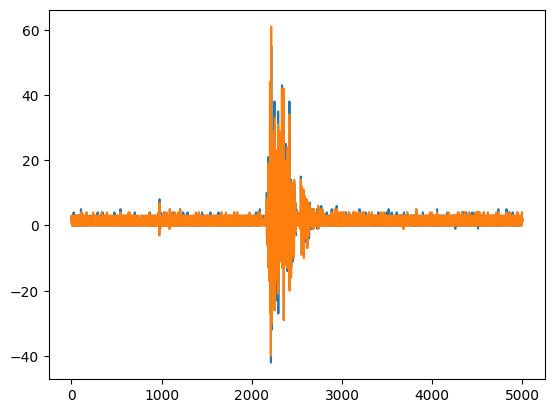

In [23]:
plt.plot(emg)

In [ ]:




def get_feature_matrix():

    rows = []
    for filename in os.listdir('./entries'):
        values = pd.read_csv(f'./entries/{filename}').iloc[:, 1:]
        label = int(filename[0])

        c = 0
        first = True
        emg_raw = np.zeros((NUM_OF_SENSORS, WINDOW_SIZE))

        for _, row in values.iterrows():
            emg_raw[:, c] = row

            if (c == WINDOW_SIZE - 1 and first) or (c == OVERLAP + 1 and not first):
                c = OVERLAP
                first = False

                emg_raw = np.roll(emg_raw, OVERLAP, axis=1)
                wl = np.sum(np.abs(np.abs(emg_raw[0, :])))

                if wl > THRESHOLD:
                    row = list(extract_features_from_entry(emg_raw)) + [label]
                    rows.append(row)
            else:
                c = c + 1

    return pd.DataFrame(rows, columns=['RMS', 'MAV', 'SSI', 'IEMG', 'Class'])